In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
import matplotlib.animation as ani
import matplotlib.ticker as ticker
%matplotlib inline

timestep=2 #ns, must be the same for the two files
thickness_of_sample=10.1950 #micrometers
energy_impulse=600 #mJ/cm^2
maxTempReached=2774 #K, is written in the end line of file .mlt
filename1='SIO2.6.td'
filename2='SIO2.6.mlt'

In [3]:
#non c'è bisogno di ricompilarlo se il file non è nuovo

with open(filename1, mode='r+') as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i[0] != 'C':
            f.write(i)
    f.truncate()

In [4]:
'''
data = np.loadtxt(filename1)
x = data[:,0]
X=data[:,:]
for i in range(1,len(X[0,:])):
    y = data[:,i]
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x=x, y=y, marker='.', c='b', label="T")
    ax.set_title('Simulation frame %i' %i, size=18)
    ax.set_xlabel('depth ($\AA$)', fontsize=18)
    ax.set_ylabel('Temperature (K)', fontsize=18)
    plt.show()
    '''

'\ndata = np.loadtxt(filename1)\nx = data[:,0]\nX=data[:,:]\nfor i in range(1,len(X[0,:])):\n    y = data[:,i]\n    fig, ax = plt.subplots(figsize=(10, 6))\n    ax.scatter(x=x, y=y, marker=\'.\', c=\'b\', label="T")\n    ax.set_title(\'Simulation frame %i\' %i, size=18)\n    ax.set_xlabel(\'depth ($\\AA$)\', fontsize=18)\n    ax.set_ylabel(\'Temperature (K)\', fontsize=18)\n    plt.show()\n    '

Text(0, 0.5, 'depth ($\\mu m$)')

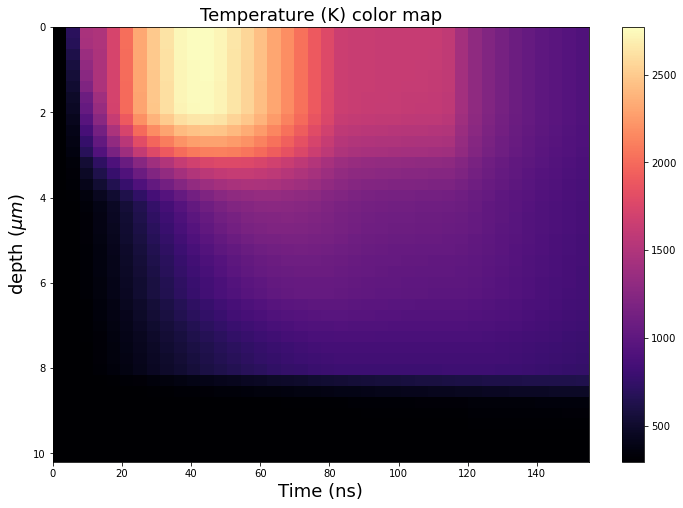

In [27]:
data = np.loadtxt(filename1)
X=data[:,1:]
fig, ax = plt.subplots(figsize=(12,8))
imagetoplot=ax.imshow(X, cmap='magma', extent=[0,155,thickness_of_sample,0], aspect='auto')
fig.colorbar(imagetoplot, orientation='vertical')
ax.set_title('Temperature (K) color map',fontsize=18)
ax.set_xlabel('Time (ns)',fontsize=18)
ax.set_ylabel('depth ($\mu m$)',fontsize=18)

In [39]:
with open(filename2, mode='r+') as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i[0] != 'C':
            f.write(i)
    f.truncate()

In [44]:
data1 = np.loadtxt(filename2)
x1= data1[:,0]
y1 = data1[:,1]
maxA=max(y1)*0.0001
L=[]
for i in range(len(x1)):
    L.append([x1[i],y1[i]])
dim=len(x1)
for i in range(len(L)-2):
    if L[i][0]% timestep != 0:
        L.pop(i)
tdepth=np.array(L)

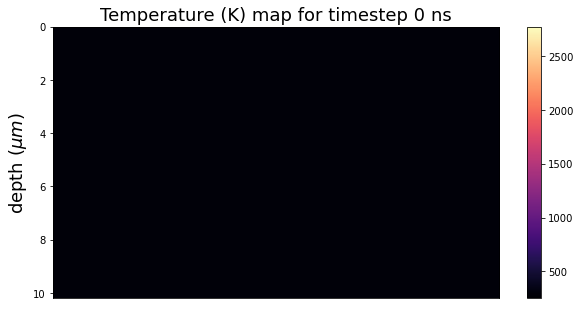

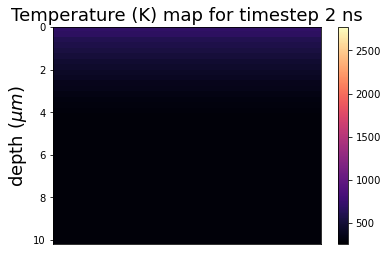

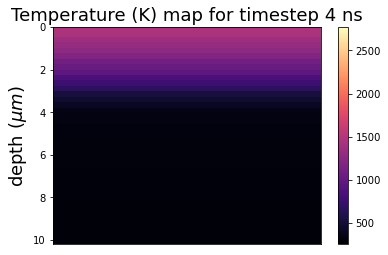

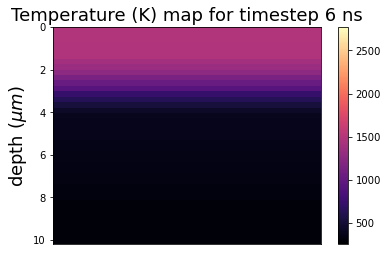

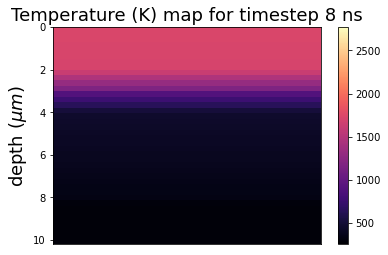

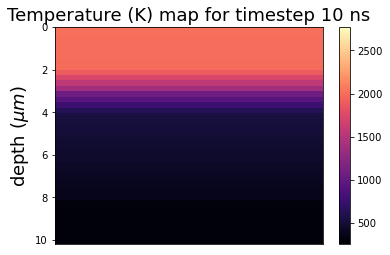

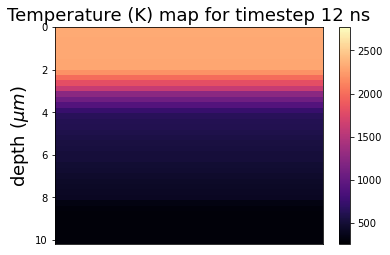

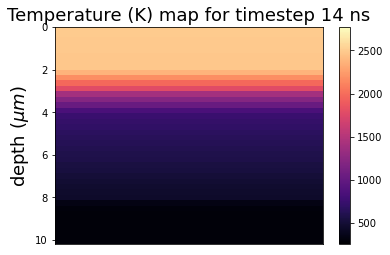

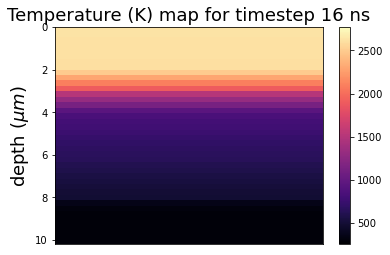

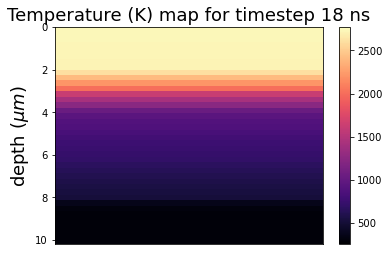

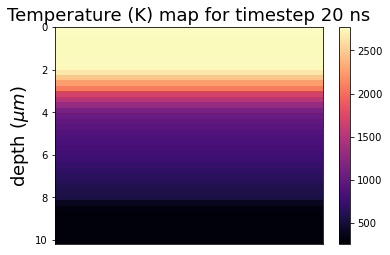

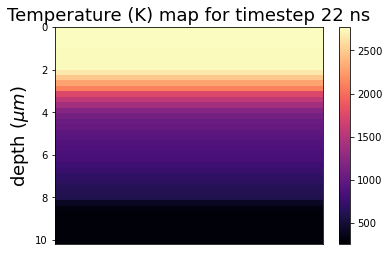

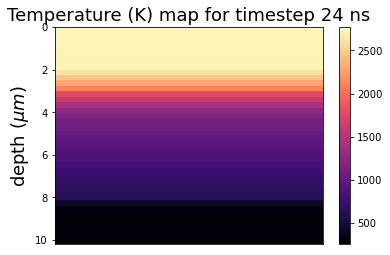

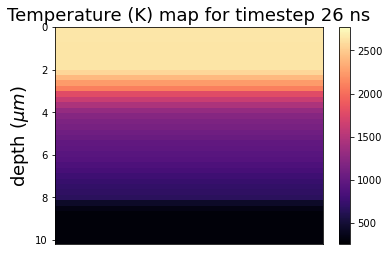

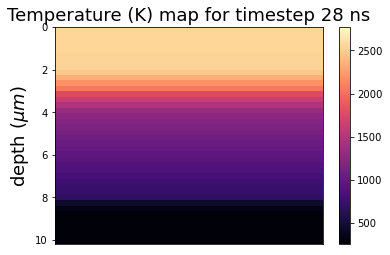

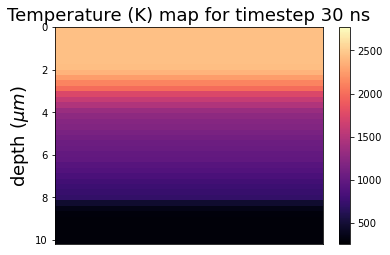

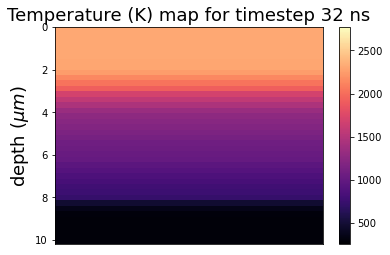

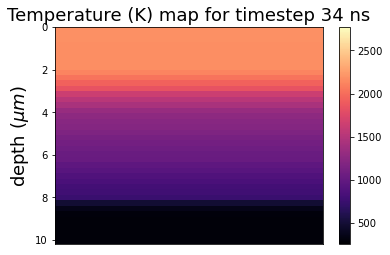

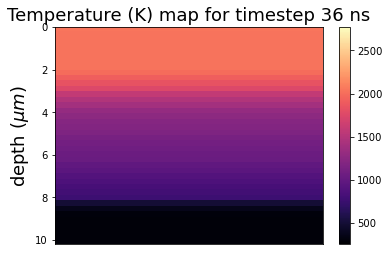

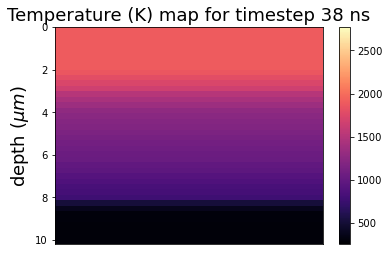

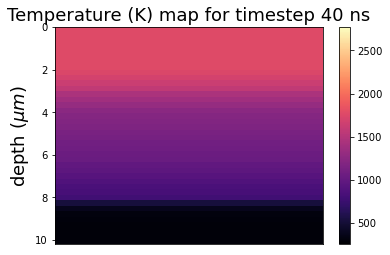

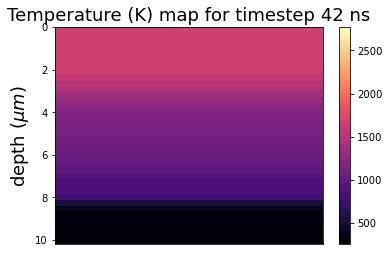

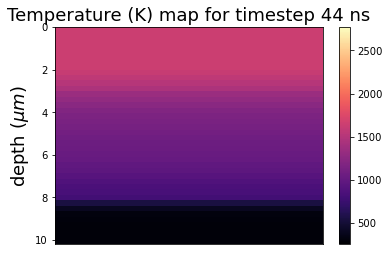

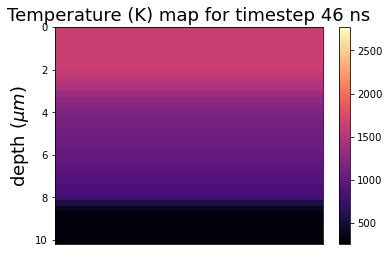

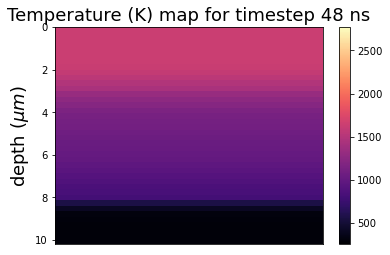

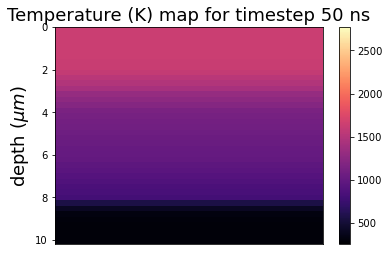

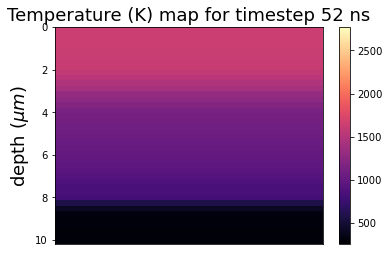

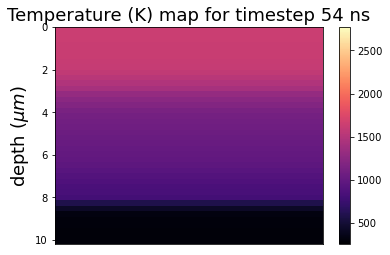

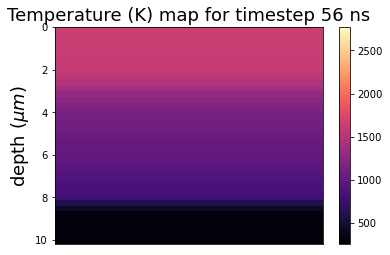

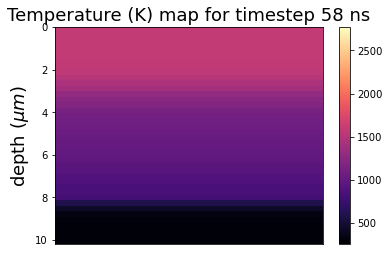

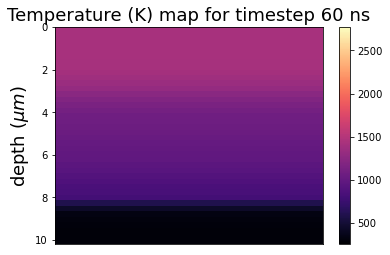

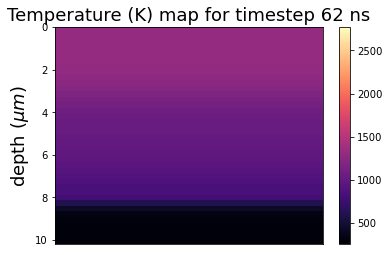

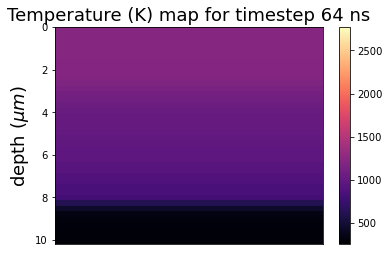

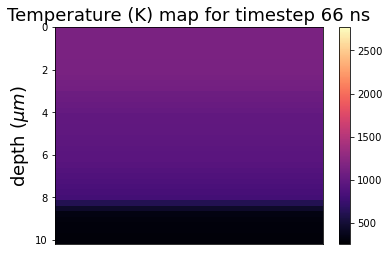

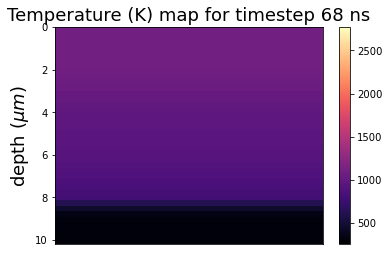

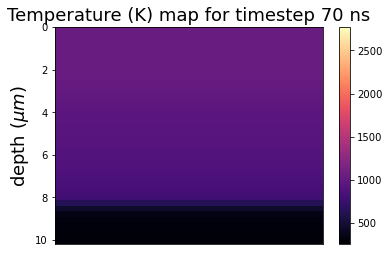

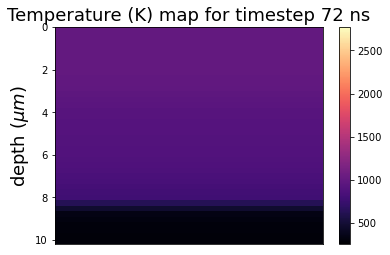

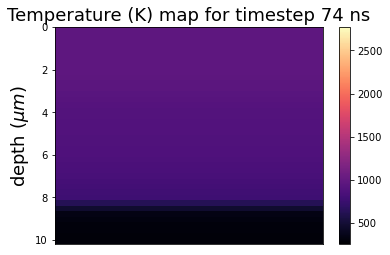

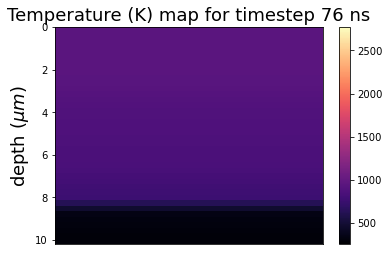

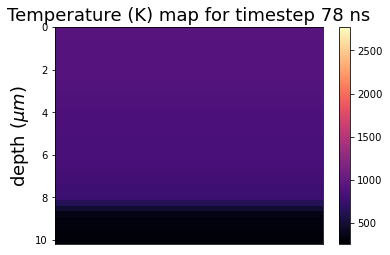

In [45]:
x = data[:,0]
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
times=[]
for i in range(1,len(X[0,:])):
    t=(i-1)*timestep
    times.append(t)
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y.T, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,100,thickness_of_sample,0], aspect='auto')
    plt.title('Temperature (K) map for timestep %i ns' %t,fontsize=18)
    plt.colorbar(imagetoplot, orientation='vertical')
    plt.ylabel('depth ($\mu m$)',fontsize=18)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
#   plt.savefig('plot %i ns' %t)
    plt.show()

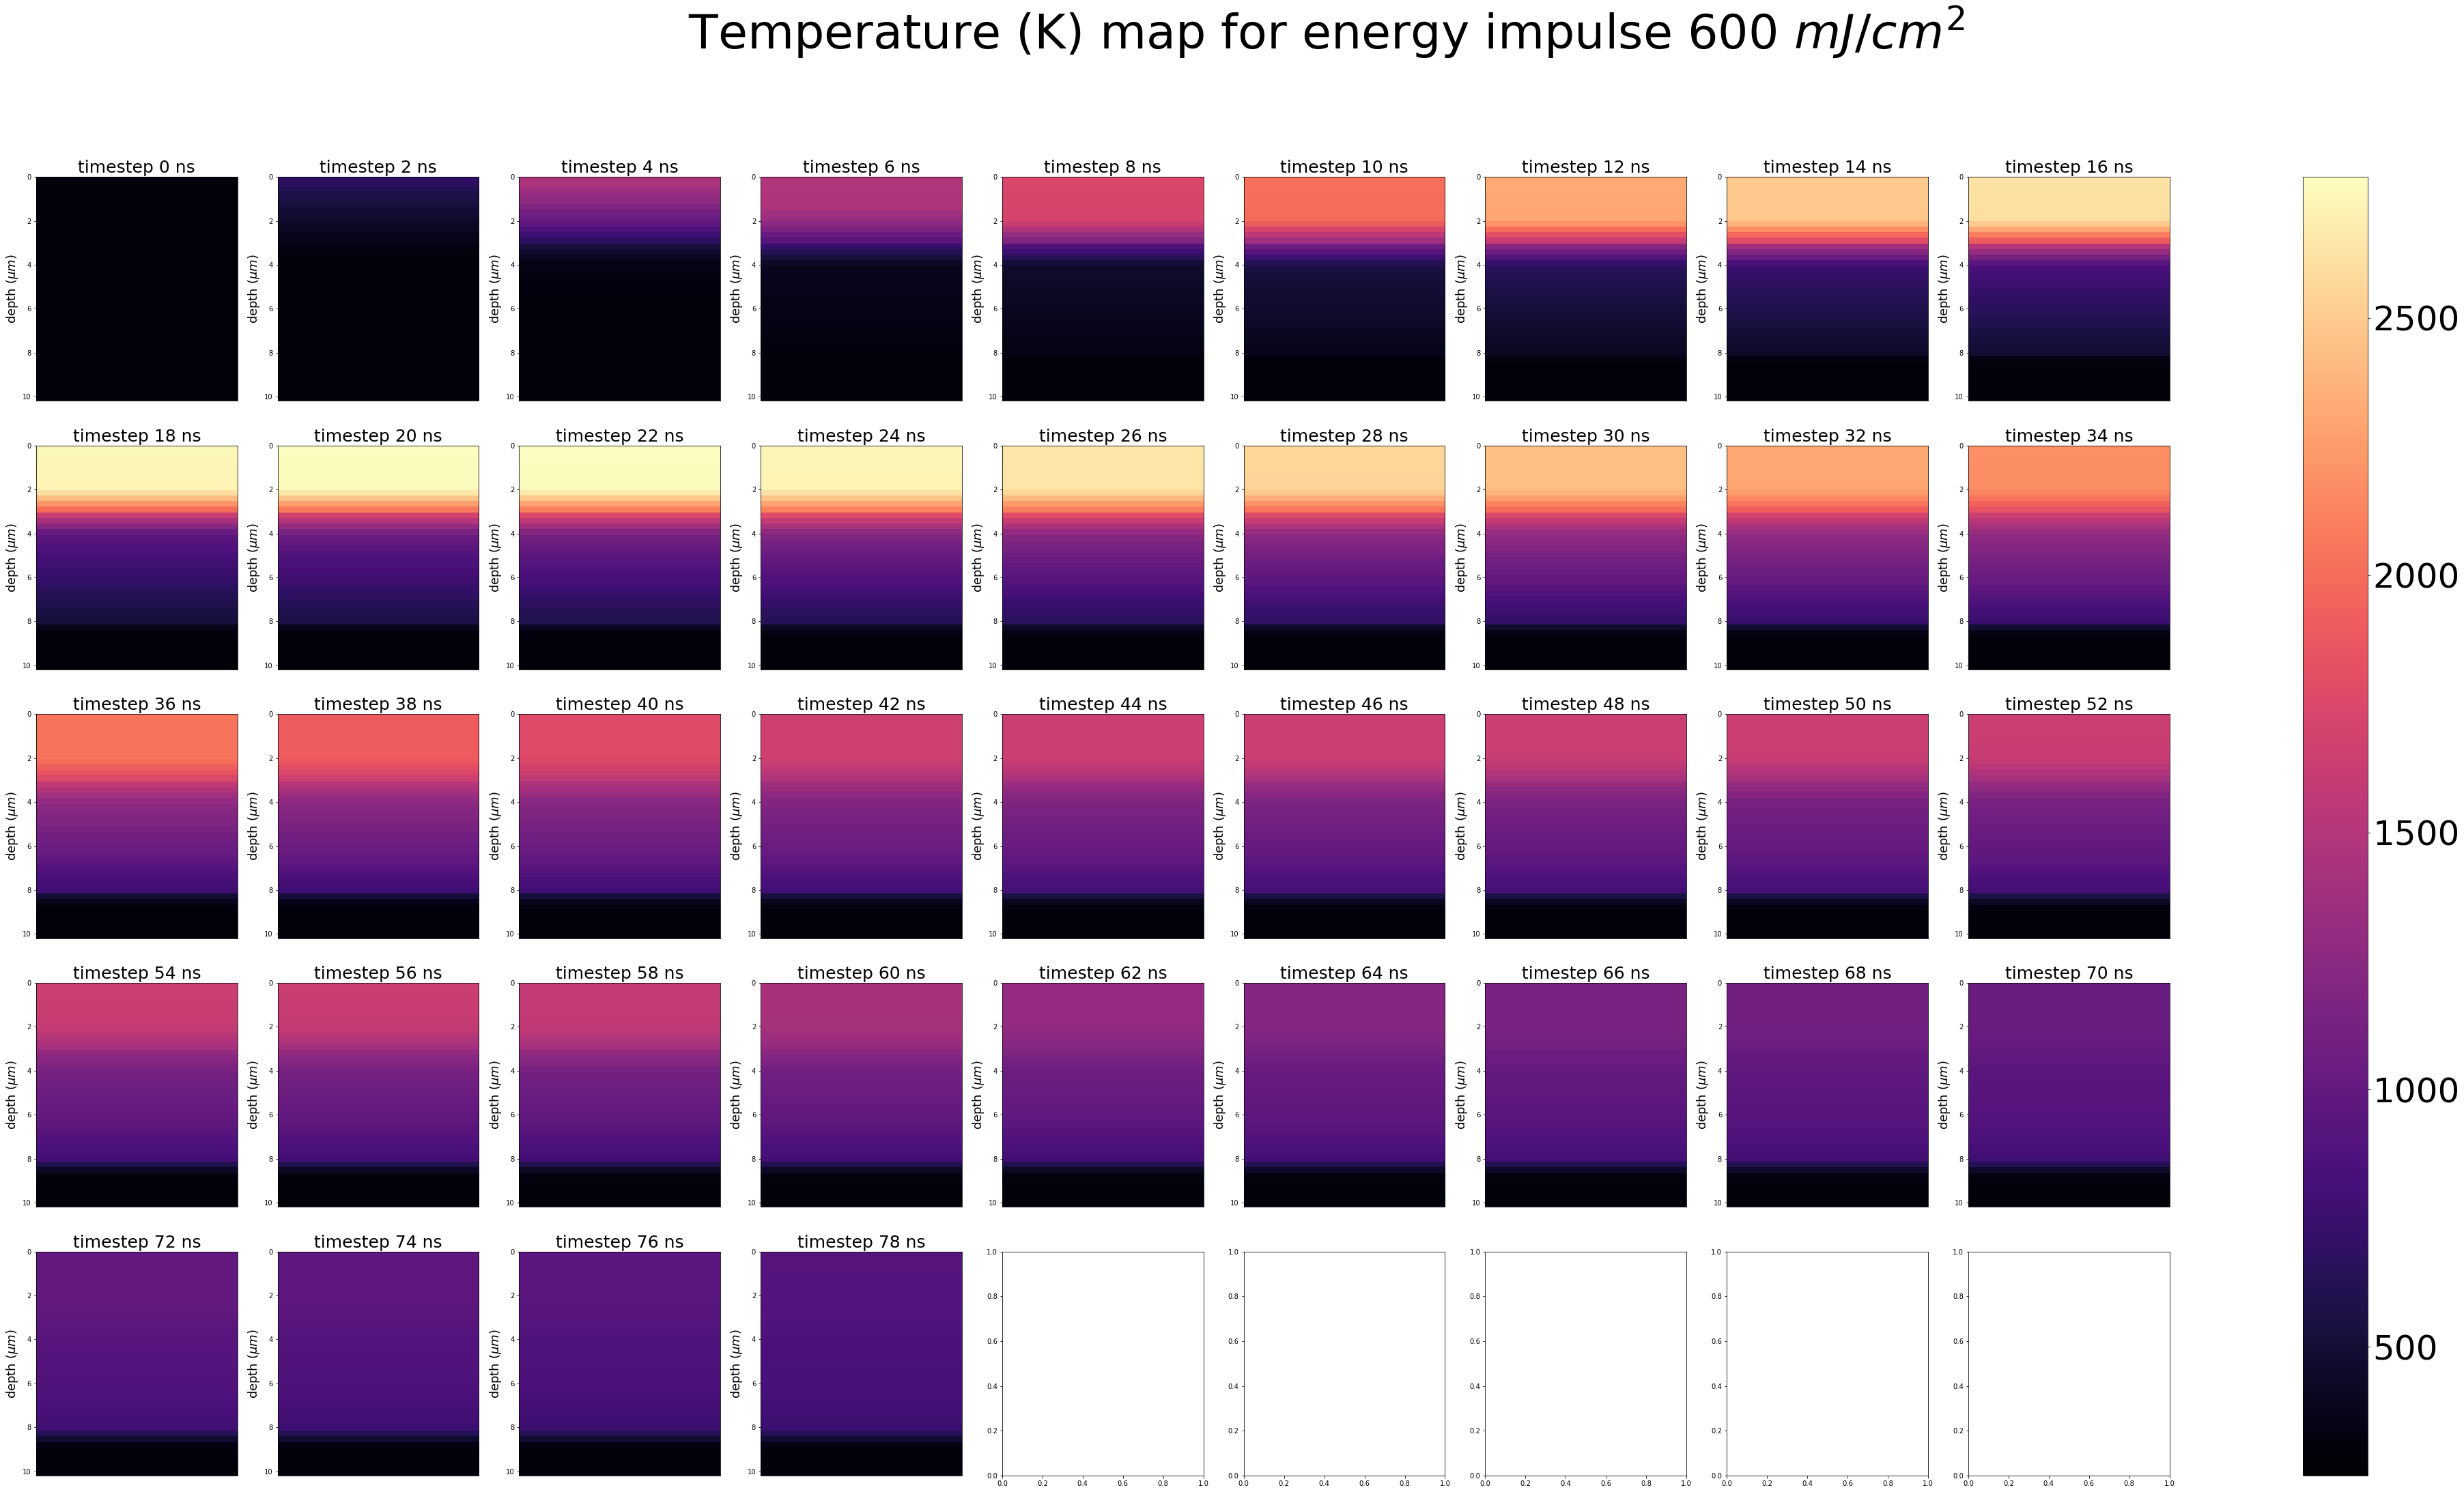

In [46]:
x = data[:,0]
X=data[:,:]
times=[]
n_cols=int(len(X[0,:])/5)#with different timestep check how many rows you desire
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))#with different timestep check how many rows you desire
ax = ax.ravel()
fig.suptitle('Temperature (K) map for energy impulse %i $mJ/cm^2$' %energy_impulse,fontsize=70)
for i in range(0,len(X[0,:])-1):
    t=(i)*timestep
    times.append(t)
    y = data[:,i+1]
    Y=np.vstack((y,y))
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    imagetoplot=ax[i].imshow(Y.T, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,100,thickness_of_sample,0], aspect='auto') 
    ax[i].set_ylabel('depth ($\mu m$)',fontsize=18)
    ax[i].xaxis.set_major_locator(ticker.NullLocator())
    
cbar=fig.colorbar(imagetoplot, orientation='vertical',ax=ax)
cbar.ax.tick_params(labelsize=50)
plt.savefig('plot %i ns' %timestep)

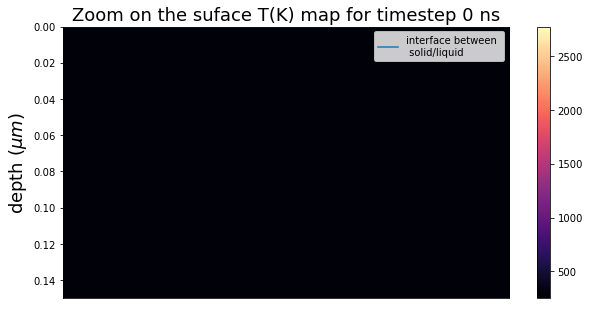

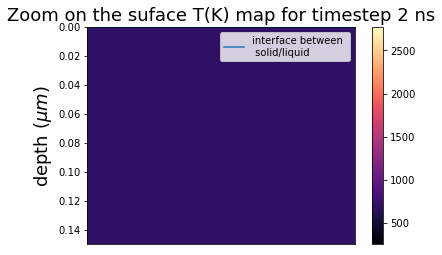

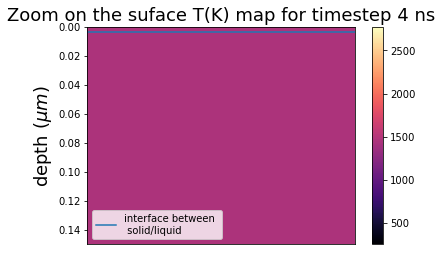

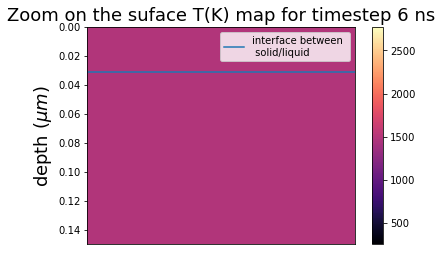

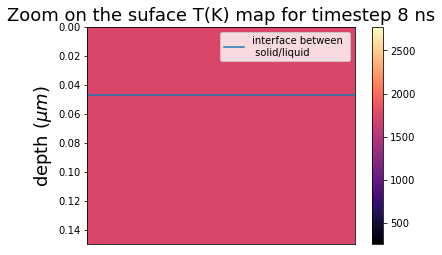

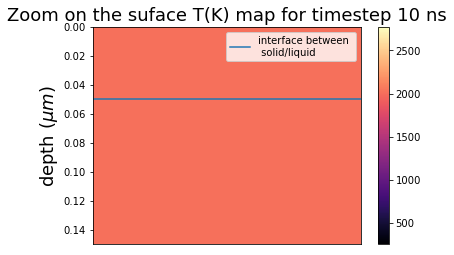

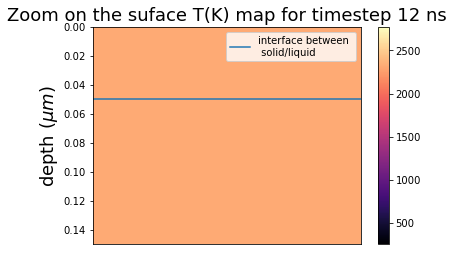

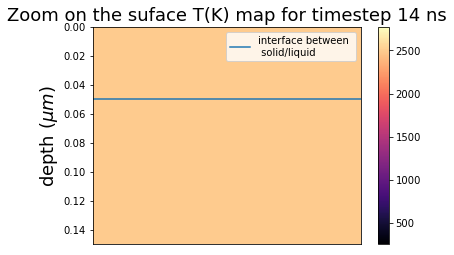

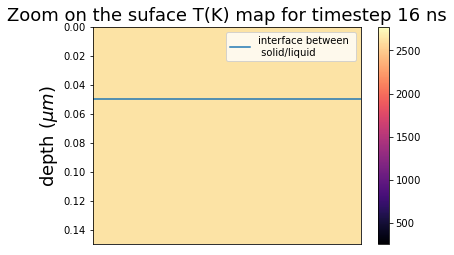

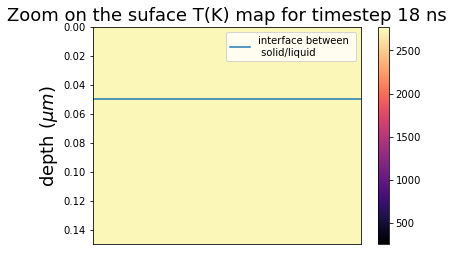

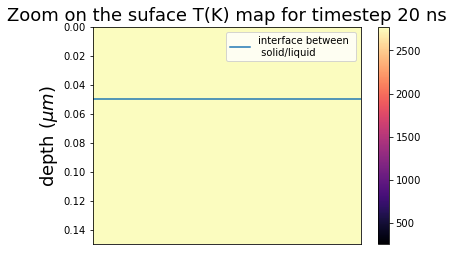

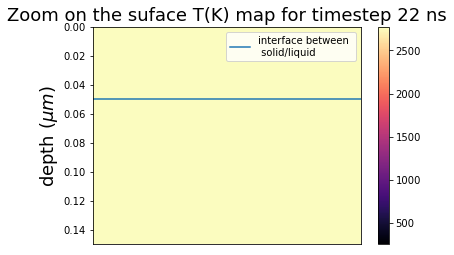

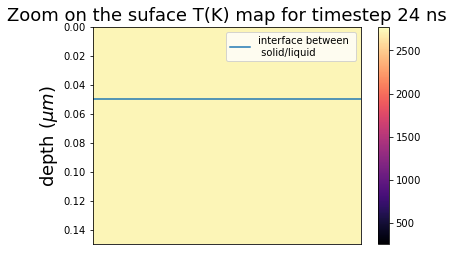

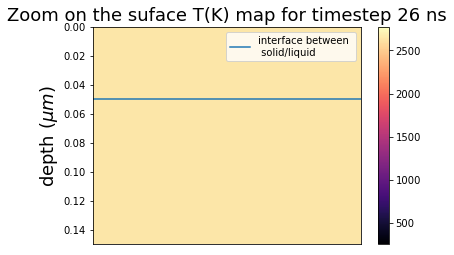

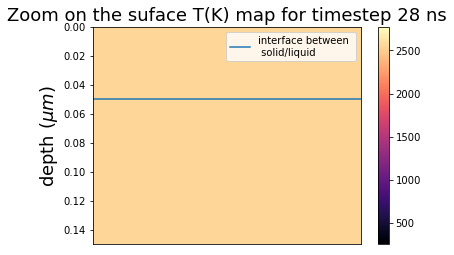

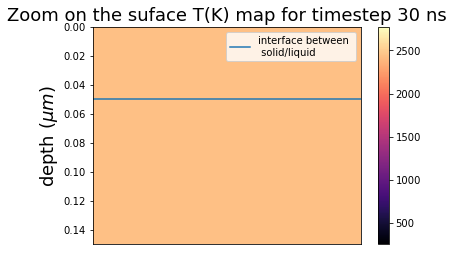

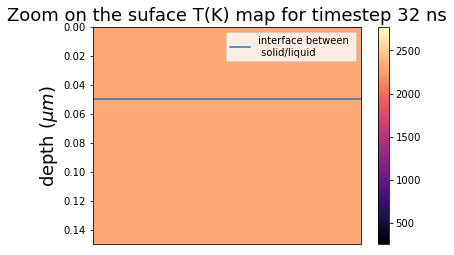

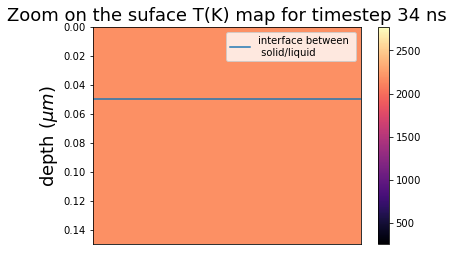

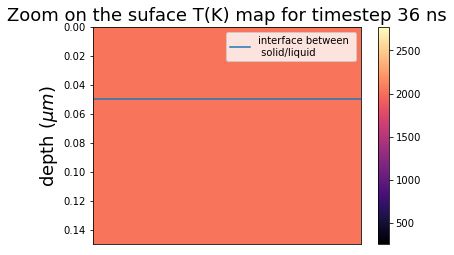

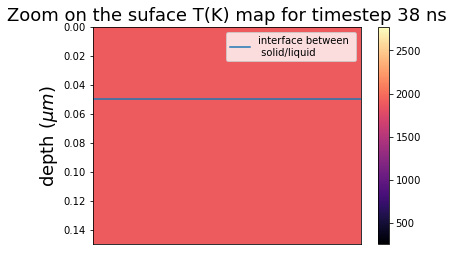

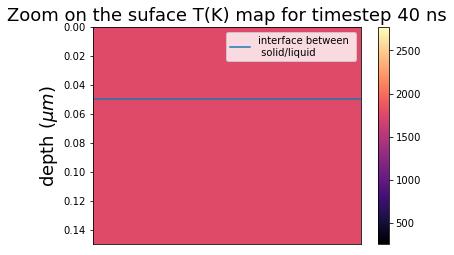

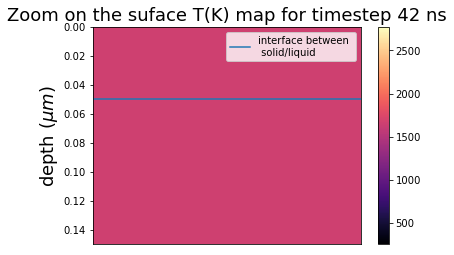

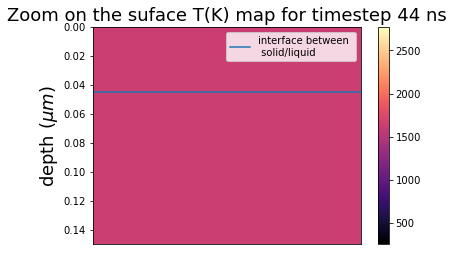

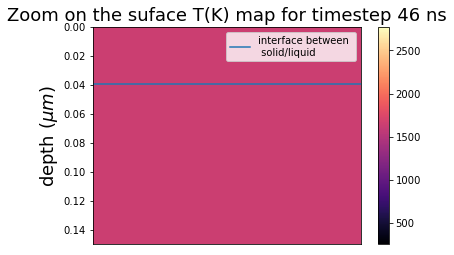

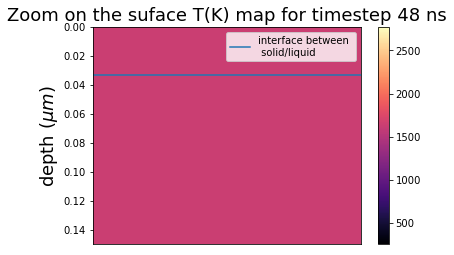

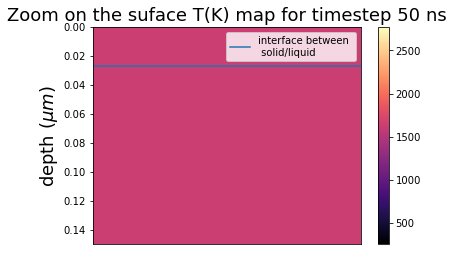

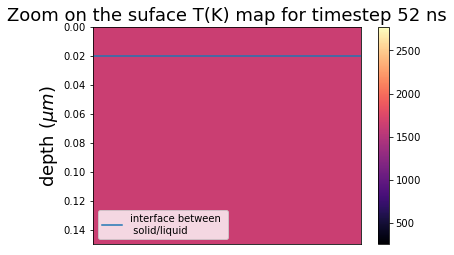

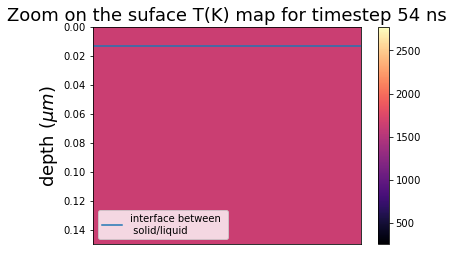

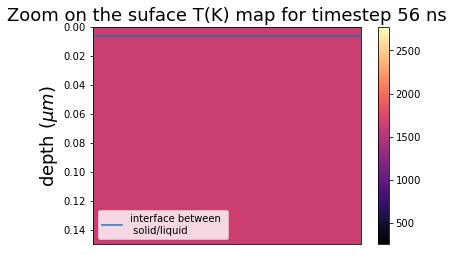

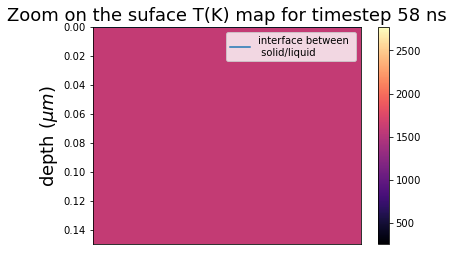

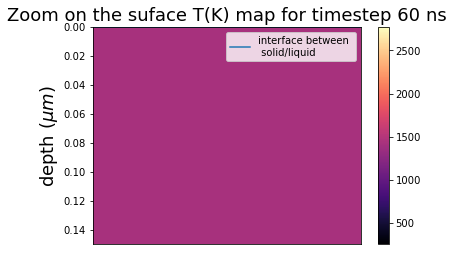

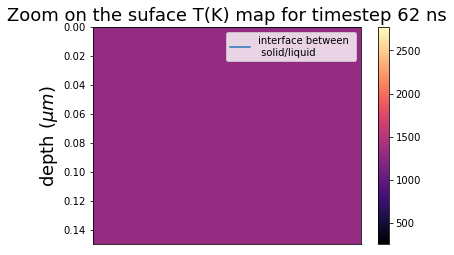

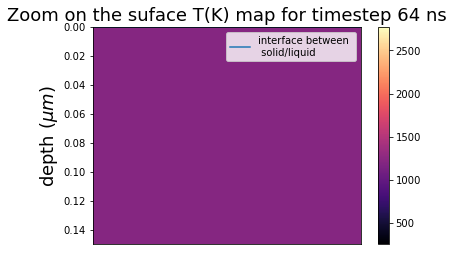

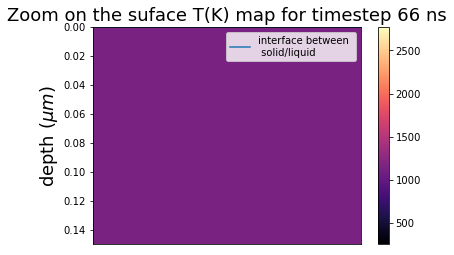

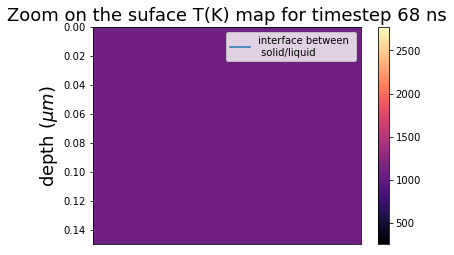

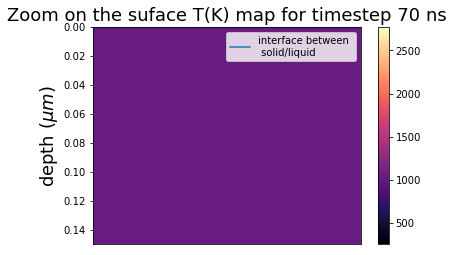

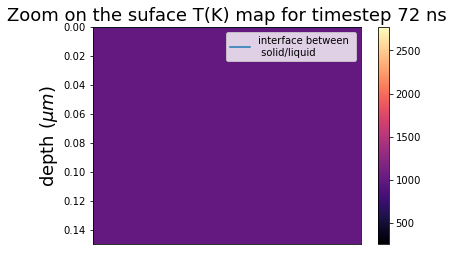

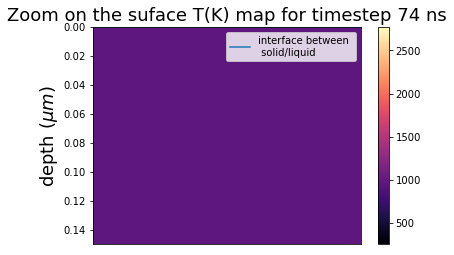

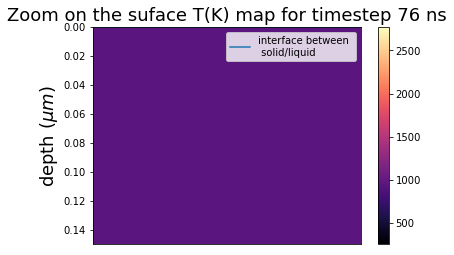

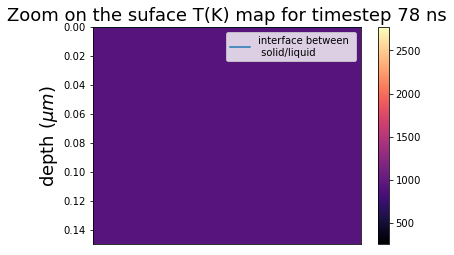

In [48]:
x = data[:,0]
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
times=[]
for i in range(1,len(X[0,:])):
    t=(i-1)*timestep
    times.append(t)
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y.T, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,100,thickness_of_sample,0], aspect='auto')
    depth=tdepth[i-1][1]*0.0001
    x1, y1 = [0,100],[depth,depth]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    plt.title('Zoom on the suface T(K) map for timestep %i ns' %t,fontsize=18)
    plt.ylim(maxA*3, 0)
    plt.colorbar(imagetoplot, orientation='vertical')
    plt.ylabel('depth ($\mu m$)',fontsize=18)
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
#   plt.savefig('plot %i ns' %t)
    plt.show()

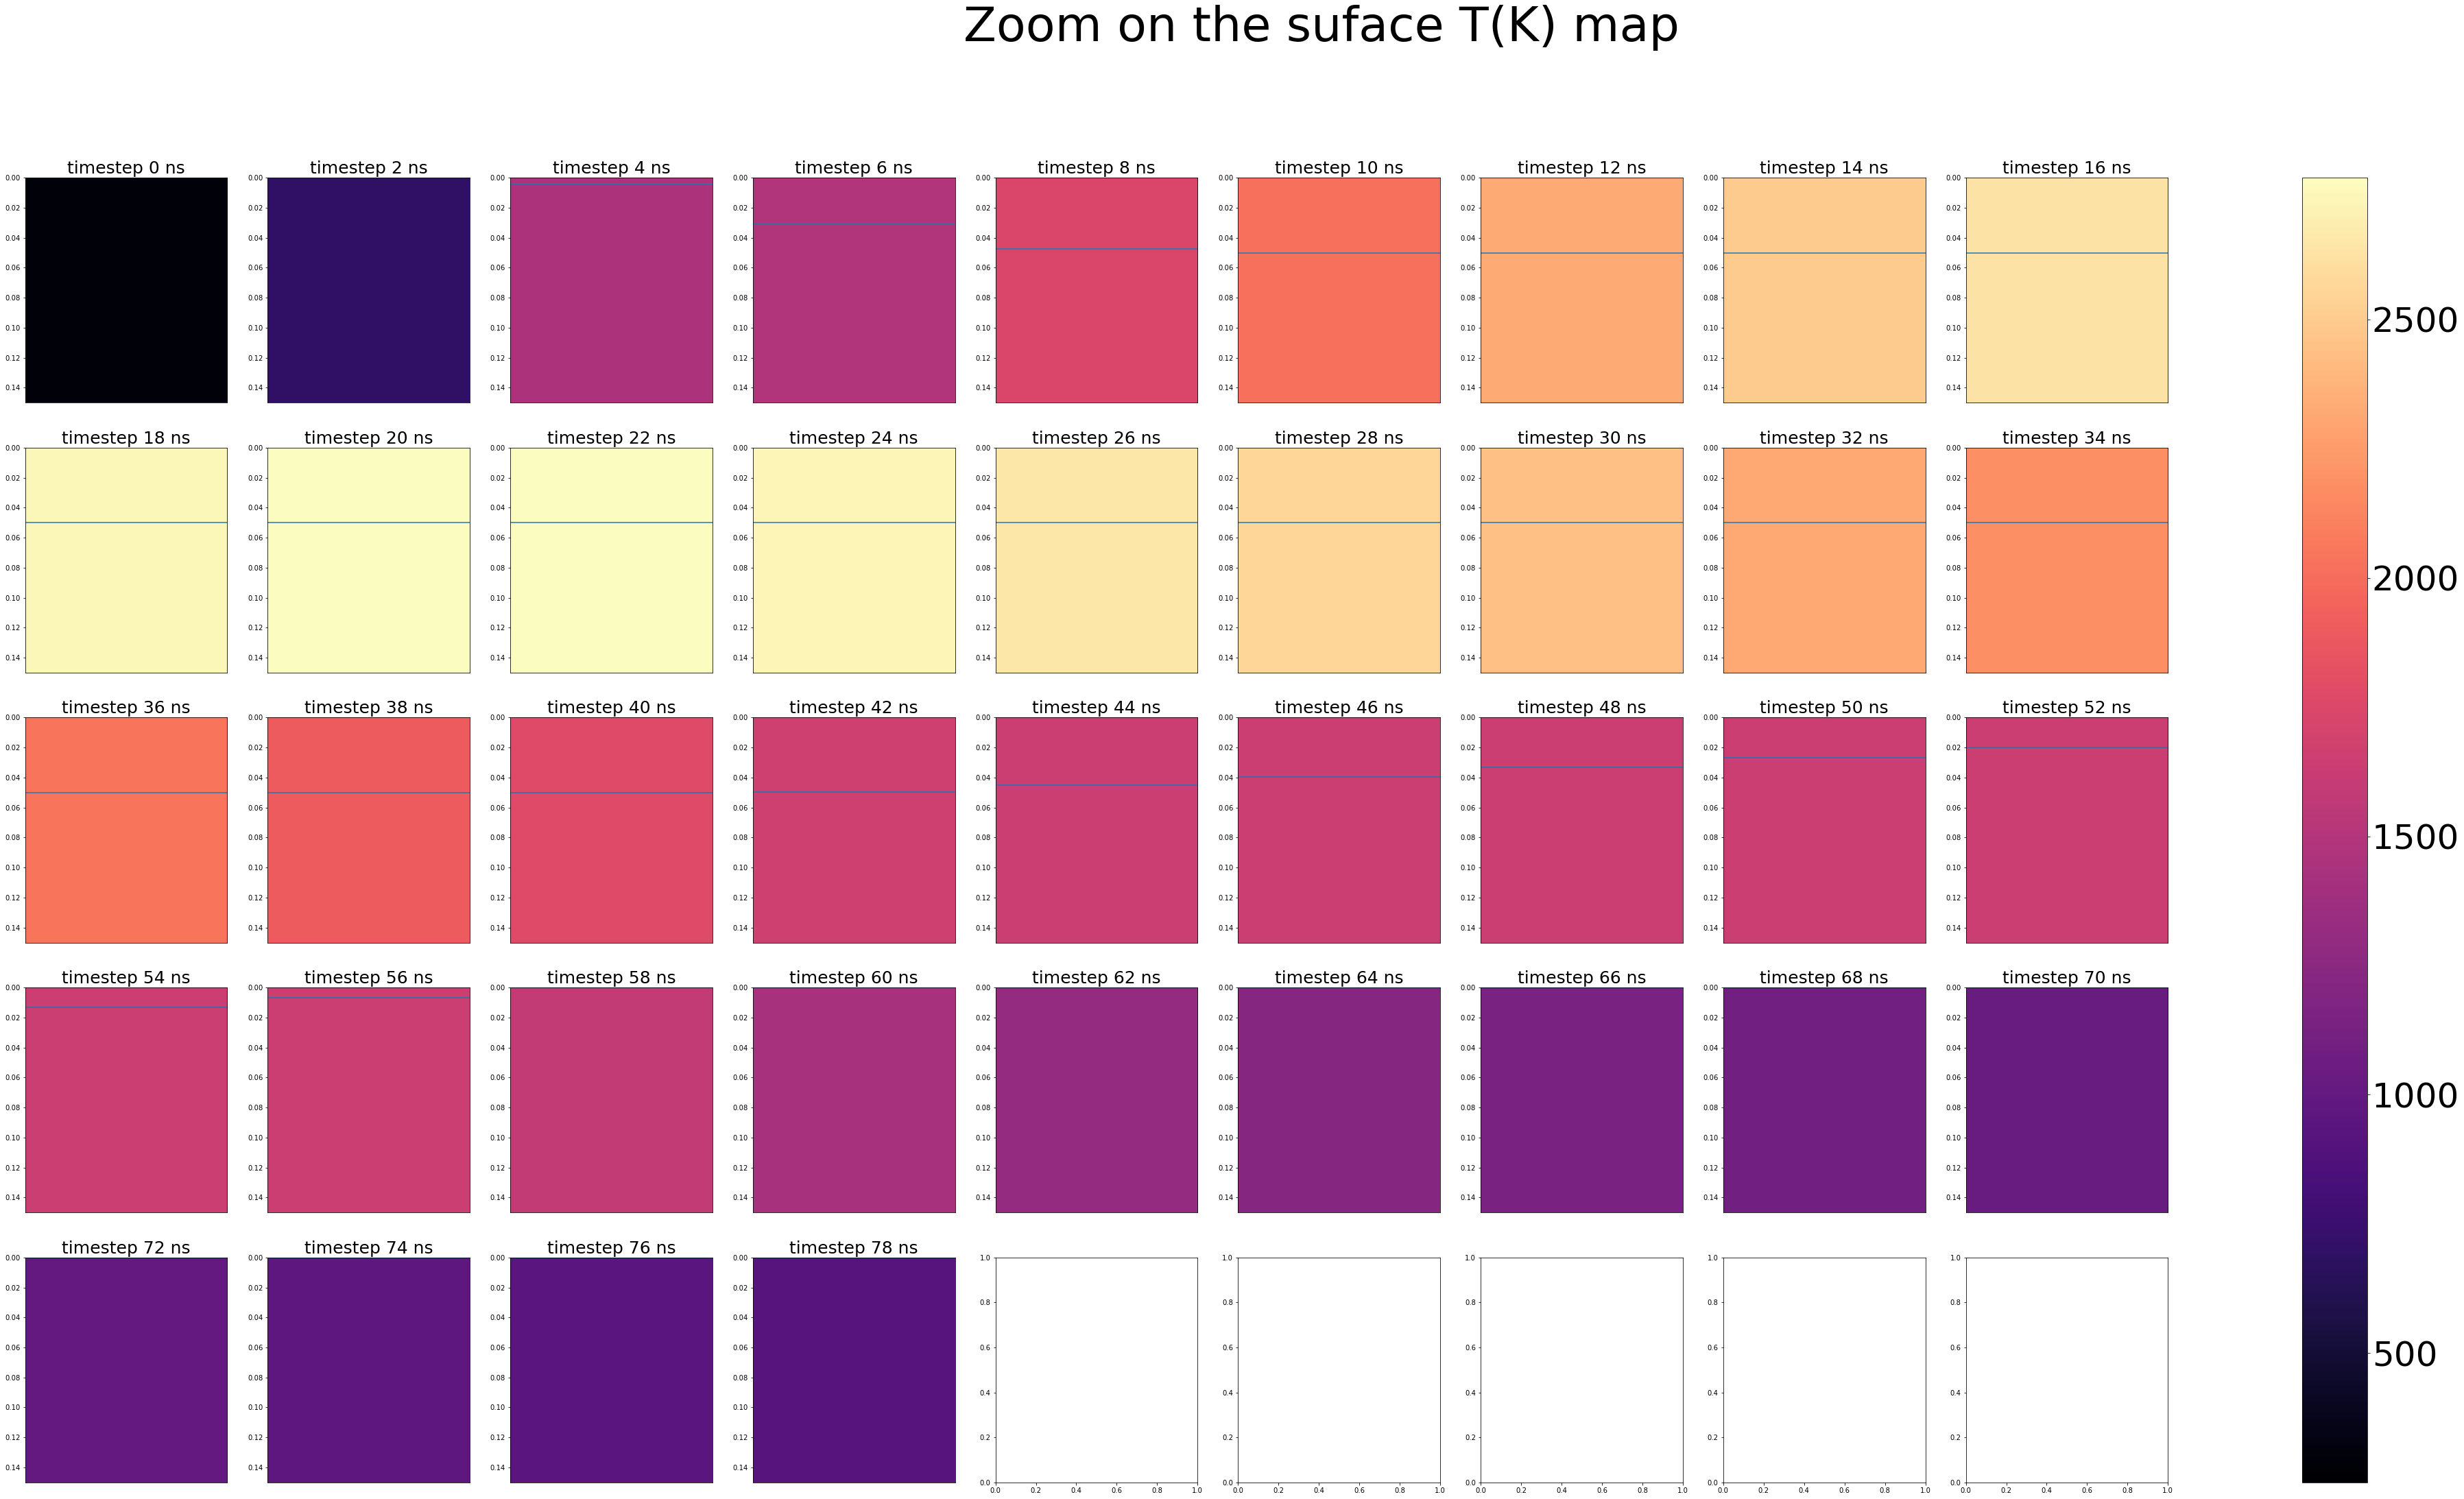

In [49]:
x = data[:,0]
X=data[:,:]
times=[]

n_cols=int(len(X[0,:])/5)
fig, ax = plt.subplots(5, n_cols+1, figsize=(70,35))
plt.suptitle('Zoom on the suface T(K) map', fontsize=70)
ax = ax.ravel()

for i in range(0,len(X[0,:])-1):
    t=(i)*timestep
    times.append(t)
    y = data[:,i+1]
    Y=np.vstack((y,y))
    imagetoplot=ax[i].imshow(Y.T, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,100,thickness_of_sample,0], aspect='auto')
    depth=tdepth[i][1]*0.0001 #if timestep 2 set [i+1] if timestep 5 set [i]
    x1, y1 = [0,100],[depth,depth]
    ax[i].set_title('timestep %i ns' %t,fontsize=25)
    ax[i].plot(x1, y1, label='interface between \n solid/liquid')
    ax[i].set_ylim(maxA*3, 0)
    ax[i].xaxis.set_major_locator(ticker.NullLocator())
cbar=fig.colorbar(imagetoplot, orientation='vertical',ax=ax)
cbar.ax.tick_params(labelsize=50)
fig.savefig('zoomplot %i ns' %timestep)

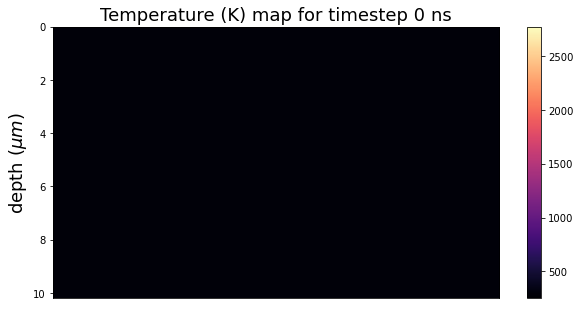

In [45]:
x = data[:,0]
X=data[:,:]
fig = plt.figure( figsize=(10, 5))
plt.colorbar(imagetoplot, orientation='vertical')
def AnimationLaserMelting(i):
    i=i+1
    t=(i-1)*5
    y = data[:,i]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y.T, cmap='magma', vmin=250, vmax=maxTempReached, extent=[0,100,thickness_of_sample,0], aspect='auto')
    plt.title('Temperature (K) map for timestep %i ns' %t,fontsize=18)
    plt.ylabel('depth ($\mu m$)',fontsize=18)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
f=len(X[0,:])-2
animator = ani.FuncAnimation(fig, AnimationLaserMelting, f, interval = 200)
   
animator.save(r'globalsampleLaserMelting.avi')



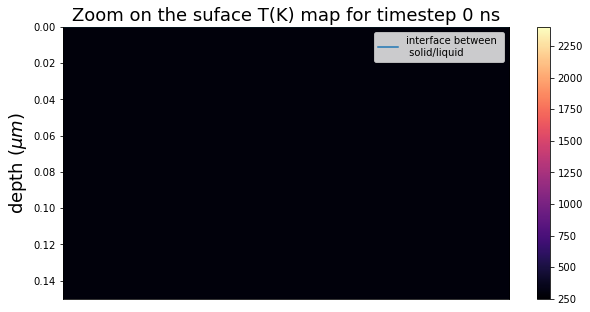

In [51]:
x = data[:,0]
X=data[:,:]

fig1 = plt.figure( figsize=(10, 5))
def ZoomLaserMelting(i):
    plt.clf()
    t=(i)*5
    y = data[:,i+1]
    Y=np.vstack((y,y))
    imagetoplot=plt.imshow(Y.T, cmap='magma', vmin=250, vmax=2400, extent=[0,100,thickness_of_sample,0], aspect='auto')
    plt.colorbar(imagetoplot, orientation='vertical')
    depth=tdepth[i][1]*0.0001
    x1, y1 = [0,100],[depth,depth]
    plt.plot(x1, y1, label='interface between \n solid/liquid')
    plt.title('Zoom on the suface T(K) map for timestep %i ns' %t,fontsize=18)
    plt.ylim(maxA*3, 0)
    plt.ylabel('depth ($\mu m$)',fontsize=18)
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    #plt.show()
f1=len(X[0,:])-1
animator1 = ani.FuncAnimation(fig1, ZoomLaserMelting, f1, interval = 300)
   
animator1.save(r'zoomLaserMelting.avi')